In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import pandas as pd
from helpers import *
from scipy.stats import pearsonr
from scipy.stats import linregress
import matplotlib.gridspec as gridspec

In [2]:
num_topics = 50
d = "topics/topics_"+str(num_topics)+"/"
sns.set(style='whitegrid')

In [3]:
print("Loading books...")
books = get_book_txts("data/coref_resolved_txts", splitlines=True)

Loading books...
Getting books...
America_A_Narrative_History_WWNorton_10th
America_Past_And_Present_Pearson_10th
Americas_History_Bedford_8th
Give_Me_Liberty_An_American_History_WWNorton_3rd
The_American_Pageant_Cengage_14th
The_Unfinished_Nation_A_Concise_History_of_the_American_People_McGraw-Hill_8th
Visions_of_America_A_History_of_the_United_States_Pearson_2nd
american_history_connecting_with_the_past
by_the_people
history_alive_united_states_thru_industrialism
hmh_the_americans_us_history_since_1877
mastering_the_teks
pearson_us_history
teks_us_history
us_history_early_colonial_period_through_reconstruction


In [48]:
means = []
medians = []
for k, v in books.items():
    paragraphs = [len(s.split()) for s in v]
    means.append(np.mean(paragraphs))
    medians.append(np.median(paragraphs))
print(np.mean(means))
print(np.std(means))
print(np.min(means))
print(np.max(means))

67.67266705716371
33.98822054458773
27.436693866807055
129.7970099667774


In [4]:
print('Combining data and cleaning data...')
book_texts = {}
for k, v in books.items():
    book_texts[k] = [sent for l in v for sent in
                     nltk.sent_tokenize(l)]


titles = sorted(books.keys())
all_text = []
book2length = []
for title in titles:
    texts = book_texts[title]
    book2length.append((title, len(texts)))
    for t in texts:
        all_text.append(t)

Combining data and cleaning data...


In [5]:
means = []
medians = []
for k, v in book_texts.items():
    paragraphs = [len(s.split()) for s in v]
    means.append(np.mean(paragraphs))
    medians.append(np.median(paragraphs))
print(np.mean(means))
print(np.std(means))
print(np.min(means))
print(np.max(means))

17.027257918714692
2.663277870682969
12.717137348304412
20.76382565863124


In [6]:
all_text[:10]

['History is filled with ironies.',
 'Luck and accidents—the unexpected and unplanned happenings of \xadlife—\u200b\xadoften shape events more than intentions.',
 'Long before Christopher Columbus lucked upon the Caribbean Sea and an unexpected continent in his effort to find a westward passage to the Indies (east Asia), the native peoples his mislabeled "Indians" had occupied and transformed the lands of the Western Hemisphere (also called the \xadAmericas—\u200b \xadNorth, Central, and South).',
 'Initially, everyone in what came to be called America came from somewhere else.',
 'By 1492, when Columbus began his voyage west from Spain across an uncharted ocean, there were millions of Native Americans living in the Western Hemisphere.',
 'The "New World" his found was new only to the Europeans who began exploring, conquering, and exploiting the region at the end of the fifteenth century.',
 'Over thousands of years, Native American peoples had developed highly sophisticated societies.

## Average sentence length

In [7]:
sent_lengths = []
for k, v in book_texts.items():
    sent_lengths.extend([len(sent.split(" ")) for sent in v])

In [8]:
np.median(sent_lengths)

15.0

In [9]:
np.std(sent_lengths)

11.467138712685179

## Examine topics

In [191]:
doc_topic_file =  d+ 'doc-topics.gz'
doc_topics = open(doc_topic_file).read().splitlines()
print(len(doc_topics), 'articles total')

384836 articles total


In [192]:
doc_topic_mat = np.array([[float(n) for n in l.strip().split("\t")[2:]] for l in doc_topics])

In [193]:
doc_topic_mat.shape

(384836, 50)

In [194]:
all_text = []
book2length = []
for title, texts in book_texts.items():
    book2length.append((title, len(texts)))
    for t in texts:
        all_text.append(t)

In [195]:
topic_names = json.load(open(d + 'topic_names.json', 'r'))

In [196]:
topic_names

{'0': 'act,federal,programs,deal,program,social security,national,public,system,created',
 '1': 'city,chicago,students,police,york city,york,boston,washington,march,king',
 '10': 'money,banks,pay,bank,tax,taxes,government,federal,land,loans',
 '11': 'workers,labor,unions,strike,jobs,work,employers,industrial,union,wages',
 '12': 'confederate,union,general,army,lee,grant,forces,lincoln,confederacy,sherman',
 '13': 'business,economic,government,roosevelt,power,leaders,believed,economy,political,federal',
 '14': 'reagan,bush,clinton,president,problems,administration,carter,faced,obama,foreign policy',
 '15': 'cities,farmers,small,families,urban,poor,rural,farms,lived,family',
 '16': 'freedom,liberty,rights,democracy,people,government,political,idea,citizens,life',
 '17': 'immigrants,percent,million,population,number,half,chinese,immigration,people,african',
 '18': 'slavery,lincoln,union,southern,states,southerners,slave,free,reconstruction,northern',
 '19': 'supreme court,court,decision,c

In [197]:
for t in doc_topic_mat.mean(axis=0).argsort()[::-1][:10]:
    print(doc_topic_mat.mean(axis=0)[t], t, topic_names[str(t)])

0.03254656580592861 20 man,people,country,good,wrote,make,god,men,woman,great
0.028726238857567084 42 century,economy,industrial,growth,society,economic,life,social,chapter,change
0.026752800912728695 16 freedom,liberty,rights,democracy,people,government,political,idea,citizens,life
0.025558549105728974 9 water,night,day,fire,houses,feet,house,room,hand,streets
0.025382374663845096 13 business,economic,government,roosevelt,power,leaders,believed,economy,political,federal
0.02527809620555785 48 information,read,sources,events,source,map,write,words,history,questions
0.02507340901317462 26 world,war,united states,civil,americans,america,end,nation,years,military
0.024645882518758107 32 democrats,republican,republicans,party,election,won,democratic,candidate,voters,votes
0.02457992109241059 35 west,california,western,region,settlers,east,river,moved,land,area
0.02443097816100872 21 growing,debate,issue,politics,violence,tensions,political,conflict,led,crisis


In [122]:
len(all_text)

384836

In [123]:
doc_topic_mat.shape

(384836, 50)

In [128]:
def get_docs_for_topic(topic_id):
    for t in np.random.choice(np.where(doc_topic_mat[:,topic_id] > 0.3)[0], 20):
        print(t, all_text[t])

In [135]:
get_docs_for_topic(42)

283466 Jo Ann Gibson Robinson, laden with Christmas packages, had forgotten the rules and sat down in the front of the bus, which was reserved for whites.
334664 They can use this measurement to come up with an estimate of the artifact's age.
33030 The situation was spinning out of control.
174849 Adam Colburn, indeed, had withdrawn Adam Colburn's hand hers, from fr om her hers, s, and and folded fol folde ded d Adam Colburn's Adam Colburn's arms arms with wit with h a sense sens se nse e of satisfied ssat atis isfified ed ambition.
185192 This Seuss cartoon (23.4)'s eyes closed tight, this Seuss cartoon (23.4) ignores the danger, saying with a satisfied smile, "The old Family bath tub is plenty safe for this Seuss cartoon (23.4)."
74798 He went personally with me until he procured the present position for me as inside salesman and to start at $60 a month.
73724 Red Cloud's negotiated so tenaciously and shrewdly, afterward, with what Red Cloud's saw as meddlesome Indian agents, that Re

In [38]:
book_means = []
for title in titles:
    doc_topics_book = d+ title + '/doc-topics.gz'
    lines = open(doc_topics_book).read().splitlines()
    book_means.append(np.array([[float(n) for n in l.strip().split("\t")[2:]] for l in lines]).mean(axis=0))

In [40]:
for t in np.array(book_means).mean(axis=0).argsort()[::-1]:
    print(np.array(book_means).mean(axis=0)[t], topic_names[str(t)])

0.018548298935630425 man,individu,human,person,great,self,natur,interest,men,good
0.018160978139118898 inform,read,sourc,question,use,map,write,chapter,word,event
0.01789188080361666 cloth,hand,hous,room,man,head,dress,street,back,men
0.01762486397049431 might,want,other,make,take,way,seem,thing,get,time
0.017344475141954484 chang,polit,societi,social,life,econom,cultur,new,revolut,way
0.015532665914503235 unit state,power,world,nation,european,america,europ,countri,econom,trade
0.015102297010538454 success,despit,achiev,littl,howev,even,remain,much,made,prove
0.01471011289921111 man,said,one,everi,men,countri,negro,wrote,woman,say
0.014566287875537858 fear,violenc,critic,radic,public,attack,danger,among,action,resent
0.014316933871490072 general,armi,confeder,union,lee,forc,grant,battl,troop,command
0.014284032312212798 constitut,state,congress,deleg,convent,vote,elect,amend,senat,repres
0.01393786178268153 govern,power,state,feder,constitut,right,author,congress,law,peopl
0.012674895

In [137]:
len(doc_topics)

384836

In [138]:
len(all_text)

384836

In [70]:
def get_topic_for_doc(doc_id, printout=True):
    doc = all_text[doc_id]
    if printout:
        print(doc)
        print(doc_topics[doc_id])
    topics = doc_topics[doc_id].strip().split()[2:]
    topics = set([i for (i, v) in enumerate(topics)
                         if float(v) > 0.1])
    if printout:
        print("Topics:")
        for t in topics:
            print(topic_names[str(t)])
    return len(topics)

In [132]:
get_topic_for_doc(198193)

Some of voters from these regions were ardent nationalists fired by passion for territorial expansion-among some of them two men who would play a great role War Hawks in nationa^ politics for much of the next four decades: Henry Clay of Kentucky and
198193	198194	4.7453501307930955E-4	8.218260526146556E-4	5.08180922067629E-4	0.0010094584027992594	6.036884562744963E-4	5.561806252979445E-4	6.442909964325833E-4	6.139848399767211E-4	6.514779122473753E-4	6.481096119393038E-4	7.963173312348776E-4	5.307284906967599E-4	6.0659034857226E-4	0.3860067250469141	5.533627149718829E-4	8.902715175839738E-4	6.317987263948181E-4	0.0014584829280050273	0.0012598778381674087	0.0011397860202008614	5.625596138453186E-4	7.382901638292879E-4	9.918800825564466E-4	0.001054731992309077	7.770664886519086E-4	0.2893193019854596	6.344913951834147E-4	7.415555438839851E-4	0.0968347047375548	7.440831653782989E-4	7.951068166055221E-4	8.295831332181516E-4	4.900068907321284E-4	0.0011052189455808875	6.653945107201807E-4	7.03

3

In [141]:
doc_topic_counts = [get_topic_for_doc(i, printout=False) for i in range(len(doc_topics))]

In [142]:
np.mean(doc_topic_counts)

2.0517623091394777

In [143]:
np.median(doc_topic_counts)

2.0

In [144]:
np.std(doc_topic_counts)

0.814721294407666

In [53]:
def verify_count_for_topic(topic_no):
    count = 0
    for t in doc_topics:
        topics = t.strip().split()[2:]
        if float(topics[topic_no]) > .2:
            count+=1
    return count

In [54]:
verify_count_for_topic(10)

7261

## Topics

In [91]:
def get_topic_for_word(word):
    topics = []
    for k, v in topic_names.items():
        if word in v:
            print(k, v)
            topics.append(int(k))
    return topics

In [25]:
def load_pmi(title=""):
    return np.load(d + title + '/pmi.npy')
def load_corr(title=""):
    return np.load(d + title + '/corr.npy')
def load_counts(title=""):
    return np.load(d + title + '/topic_count.npy')

In [17]:
titles = ["America_A_Narrative_History_WWNorton_10th","America_Past_And_Present_Pearson_10th","american_history_connecting_with_the_past","Americas_History_Bedford_8th","by_the_people","Give_Me_Liberty_An_American_History_WWNorton_3rd","history_alive_united_states_thru_industrialism","hmh_the_americans_us_history_since_1877","mastering_the_teks","pearson_us_history","teks_us_history","The_American_Pageant_Cengage_14th","The_Unfinished_Nation_A_Concise_History_of_the_American_People_McGraw-Hill_8th","us_history_early_colonial_period_through_reconstruction","Visions_of_America_A_History_of_the_United_States_Pearson_2nd"]

In [94]:
with open('data/dem_per_book.json', 'r') as f:
    dem_per_book = json.load(f)

## Plotting

In [95]:
shape_mapper = get_shapes(abbr=True)
color_mapper = get_colors(abbr=True)

In [96]:
title_abbr = get_title_abbr()

In [97]:
def get_ratio_of_topic_prominence(topic1, topic2, name1, name2):
    df_ratio = []
    df_book = []
    df_dem = []
    for t in titles:
        # remove books that only cover half of US history
        if 'early' in t or 'industr' in t or 'since' in t:
            continue
        if t == 'all':
            continue
        df_book.append(title_abbr[t])
        df_dem.append(dem_per_book[t])
        counts = load_counts(t)
        prop = counts / np.sum(counts) * 100
        df_ratio.append(prop[topic1] / prop[topic2])
    return pd.DataFrame({'Book': df_book, 'ratio': df_ratio, 'dem': df_dem})

In [102]:
get_topic_for_word("slaveri")

15 slaveri,southern,lincoln,union,state,northern,south,territori,reconstruct,republican
30 slave,black,free,african,white,planter,southern,slaveri,former,plantat


[15, 30]

In [103]:
get_topic_for_word("milit")

10 war,world,unit state,civil,end,america,nation,american,militari,first


[10]

In [104]:
get_topic_for_word("wom")

0 women,right,movement,civil,equal,vote,african,abolitionist,organ,polit
35 women,men,children,famili,work,young,husband,woman,mother,marri


[0, 35]

In [105]:
get_topic_for_word("men")

0 women,right,movement,civil,equal,vote,african,abolitionist,organ,polit
13 centuri,polit,movement,chang,era,earli,decad,revolut,debat,social
16 british,colonist,coloni,britain,french,tax,parliament,king,act,independ
19 man,said,everi,men,god,wrote,upon,countri,one,negro
35 women,men,children,famili,work,young,husband,woman,mother,marri
43 reform,parti,polit,organ,progress,group,movement,social,member,farmer


[0, 13, 16, 19, 35, 43]

In [106]:
get_topic_for_word("presid")

25 jackson,jefferson,adam,federalist,presid,andrew jackson,hamilton,republican,support,parti
44 roosevelt,presid,wilson,taft,deal,theodor roosevelt,franklin roosevelt,secretari,truman,fdr
45 kennedi,presid,vietnam,reagan,nixon,eisenhow,bush,johnson,administr,soviet
47 congress,constitut,vote,state,senat,elect,deleg,convent,presid,repres


[25, 44, 45, 47]

In [112]:
name1 = "Slavery"
name2 = "Military"
slavery_df = get_ratio_of_topic_prominence(30, 10, name1, name2)

In [113]:
def get_ratio_of_topic_group_prominence(topics_1, topics_2):
    df_ratio = []
    df_book = []
    df_dem = []
    df_minratio = []
    df_maxratio = []
    for t in titles:
        if 'early' in t or 'industr' in t or 'since' in t:
            continue
        if t == 'all':
            continue
        df_book.append(title_abbr[t])
        df_dem.append(dem_per_book[t])
        counts = load_counts(t)
        prop = counts / np.sum(counts) * 100
        df_ratio.append(np.sum([prop[topic1] for topic1 in topics_1]) / np.sum([prop[topic2] for topic2 in topics_2]))
        
        # get leave-out values
        ratios = []
        for t1 in topics_1:
            for t2 in topics_2:
                ratios.append(prop[t1] / prop[t2])
        df_minratio.append(min(ratios))
        df_maxratio.append(max(ratios))
        
    return pd.DataFrame({'Book': df_book, 'ratio': df_ratio, 'dem': df_dem, 'min_ratio': df_minratio, 'max_ratio': df_maxratio})

In [114]:
#women_topics = get_topic_for_word("slaveri")
#president_topics = get_topic_for_word("milit")
#slavery_df = get_ratio_of_topic_group_prominence(women_topics, president_topics)
women_topics = get_topic_for_word("women")
president_topics = get_topic_for_word("presid")
women_df = get_ratio_of_topic_group_prominence(women_topics, president_topics)

0 women,right,movement,civil,equal,vote,african,abolitionist,organ,polit
35 women,men,children,famili,work,young,husband,woman,mother,marri
25 jackson,jefferson,adam,federalist,presid,andrew jackson,hamilton,republican,support,parti
44 roosevelt,presid,wilson,taft,deal,theodor roosevelt,franklin roosevelt,secretari,truman,fdr
45 kennedi,presid,vietnam,reagan,nixon,eisenhow,bush,johnson,administr,soviet
47 congress,constitut,vote,state,senat,elect,deleg,convent,presid,repres


In [115]:
def plot_on_axis(df, ax, title, x="dem", y="ratio", show_legend=False, fontsize=12, show_ylabel=True,
                p_value_show=0.05, p_val_pos=.6):
    p = sns.scatterplot(x, # Horizontal axis
       y, # Vertical axis
       data=df, # Data source
       hue='Book',
       style='Book',
       markers=shape_mapper,
       palette=color_mapper,
       s=100, ax=ax, legend=show_legend)
    
    slope, intercept, r_value, p_value, std_err = linregress(df[x], df[y])
    print(p_value)
    ax.plot(df[x], intercept + slope*df[x], 'grey', label='_nolegend_')
    ax.axhline(y=1, color='b', label='Equal Topic Frequency', linestyle='--')
    ax.text(x=23, y=p_val_pos,s="$\it{r}$ = %.2f\n$\it{p}$ %s" % (r_value, p_value_show))
    ax.set_title(title, fontsize=fontsize+4)
    if show_ylabel:
        ax.set_ylabel('Ratio of Topic Prominence', fontsize=fontsize)
    else:
        ax.set_ylabel('')
    ax.set_xlabel('Median % of Democrats Across Counties\nWhere Book is Bought', fontsize=fontsize)
    ax.set_ylim(df[y].min()-.1, df[y].max()+.1)
    sns.despine()

0.024057424501514768
0.07114977815086974


<Figure size 432x288 with 0 Axes>

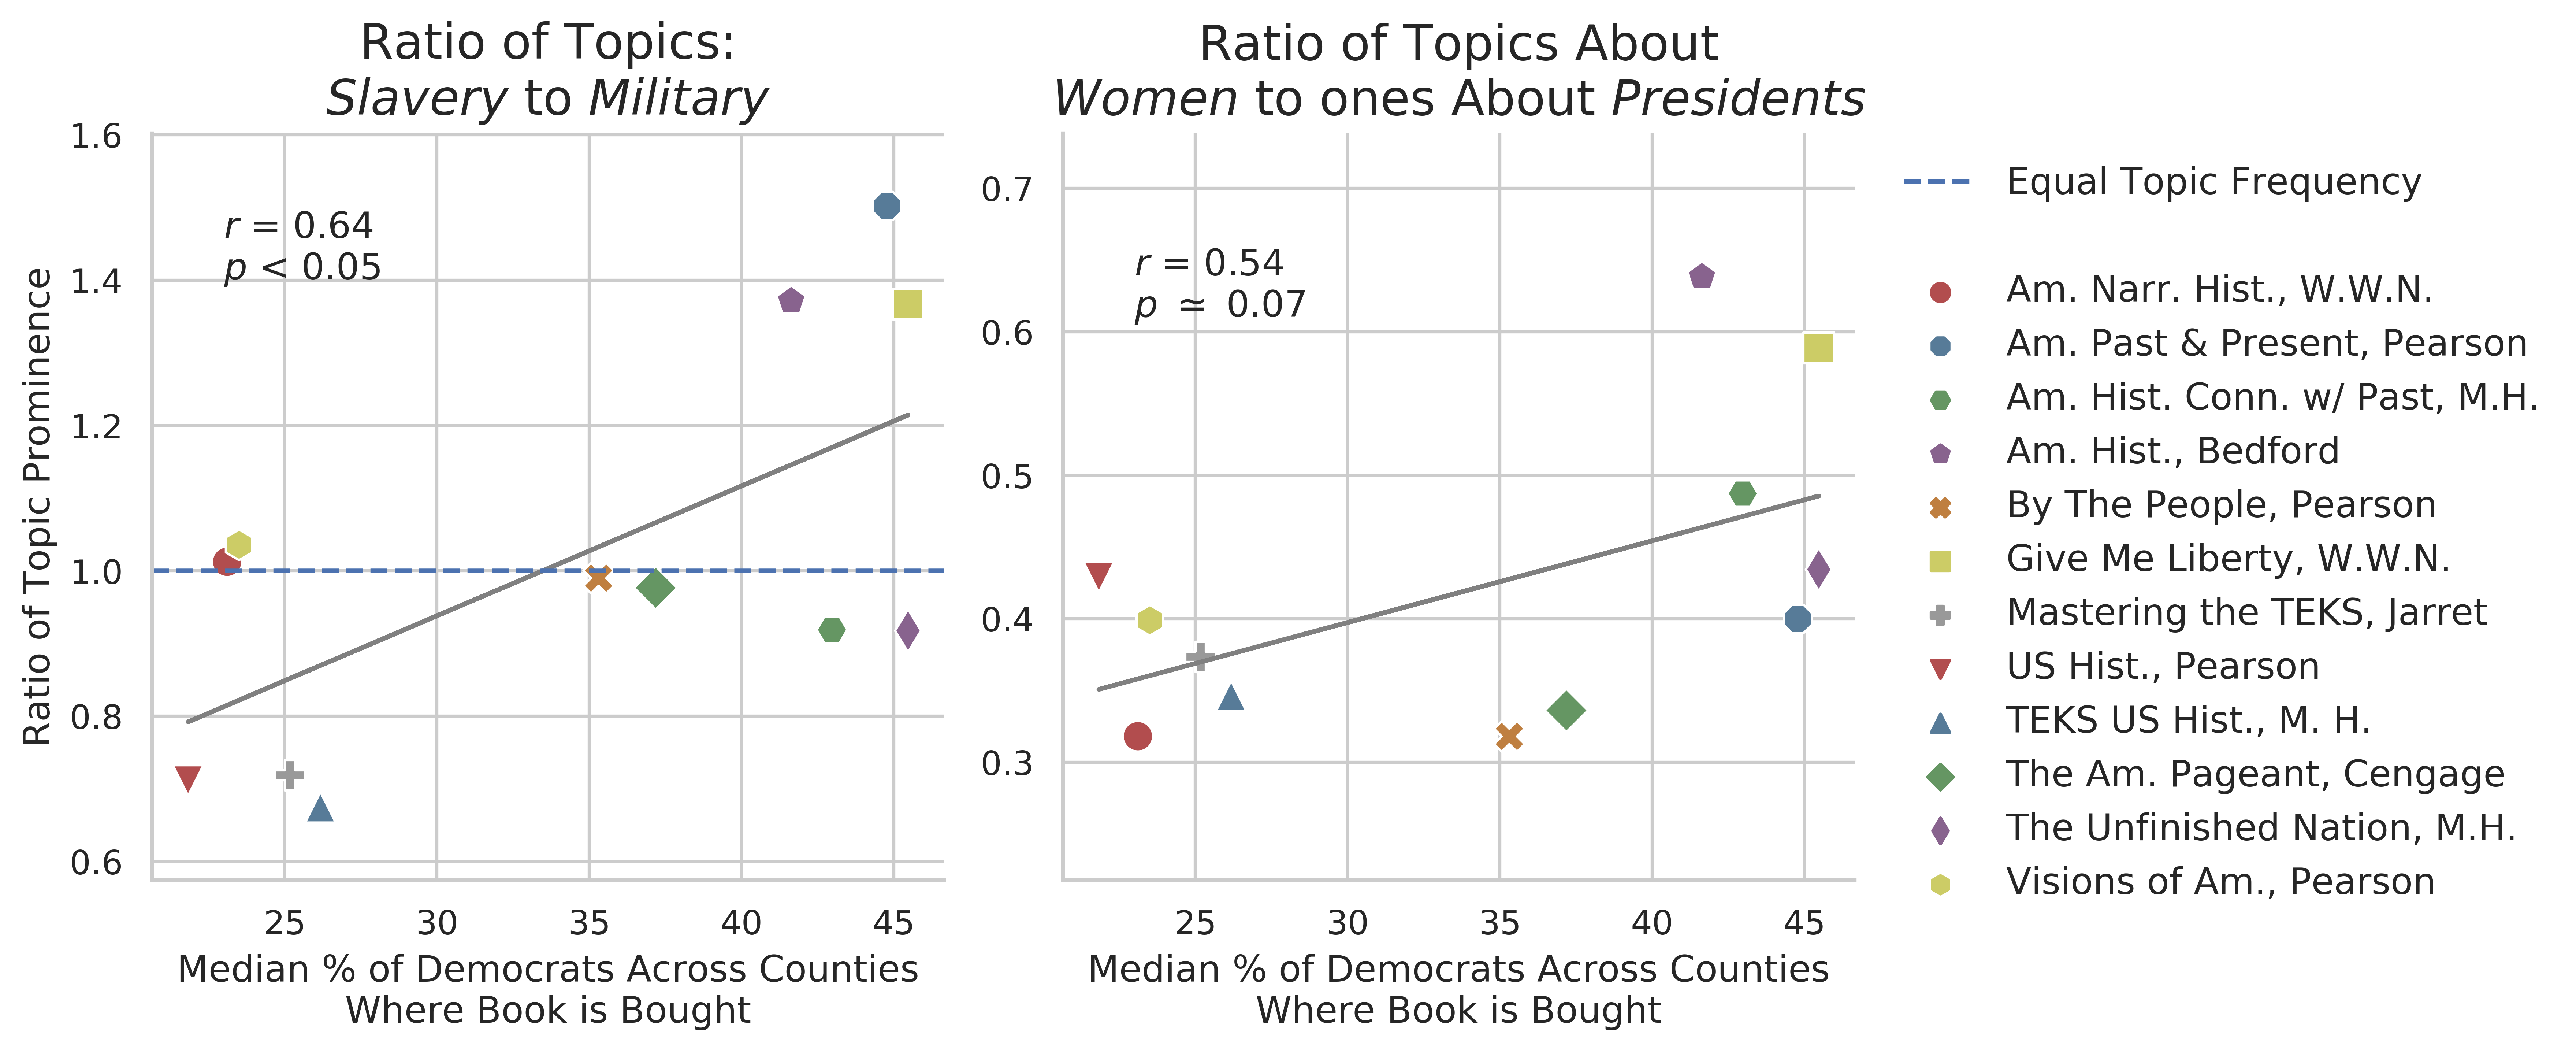

In [116]:
sns.set(style='whitegrid')
sns.despine()
fontsize=12
fig = plt.figure(figsize=(10, 4.5), dpi=600)
gs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig, wspace=0.15)
ax1 = fig.add_subplot(gs[0, 0])
title1 = "Ratio of Topics:\n$\it{"+name1 + "}$ to $\it{"+name2+"}$"
plot_on_axis(slavery_df, ax1, title1, fontsize=fontsize, show_ylabel=True,
             p_value_show="< 0.05", p_val_pos=1.4)
ax2 = fig.add_subplot(gs[0, 1:3])
title2 = "Ratio of Topics About\n$\it{Women}$ to ones About $\it{Presidents}$"
plot_on_axis(women_df, ax2, title2, show_legend="full", fontsize=fontsize, show_ylabel=False,
             p_value_show="$\simeq$ 0.07", p_val_pos=.61)
l = plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", frameon=False, fontsize=fontsize)
l.texts[1].set_text('')
plt.savefig("results/figure7_topic_ratios.pdf", dpi=800, format="pdf", bbox_inches="tight")

# Most prominent topics

In [41]:
def get_most_prominent(num_topics):
    allt = np.zeros((len(titles), num_topics))
    idx = 0
    for title in titles:
        allt[idx, :] = load_counts(title)
        allt[idx, :] /= np.sum(allt[idx, :] )
        idx +=1
    across_books = np.mean(allt, axis=0)
    for t in across_books.argsort()[::-1]:
        print(round(across_books[t], 4),'\t', topic_names[str(t)])

In [42]:
get_most_prominent(num_topics)

0.02 	 might,want,other,make,take,way,seem,thing,get,time
0.0192 	 man,individu,human,person,great,self,natur,interest,men,good
0.0175 	 cloth,hand,hous,room,man,head,dress,street,back,men
0.0173 	 chang,polit,societi,social,life,econom,cultur,new,revolut,way
0.0171 	 inform,read,sourc,question,use,map,write,chapter,word,event
0.017 	 success,despit,achiev,littl,howev,even,remain,much,made,prove
0.0157 	 fear,violenc,critic,radic,public,attack,danger,among,action,resent
0.0155 	 man,said,one,everi,men,countri,negro,wrote,woman,say
0.0152 	 unit state,power,world,nation,european,america,europ,countri,econom,trade
0.0144 	 year,two,day,three,four,old,later,thousand,twenti,hundr
0.0135 	 constitut,state,congress,deleg,convent,vote,elect,amend,senat,repres
0.0134 	 conflict,issu,polit,debat,tension,divis,section,slaveri,two,parti
0.0134 	 govern,power,state,feder,constitut,right,author,congress,law,peopl
0.0127 	 general,armi,confeder,union,lee,forc,grant,battl,troop,command
0.0127 	 slave

In [43]:
def get_most_prominent2(num_topics):
    counts = load_counts()
    print(counts)
    proportion = counts / counts.sum()
    for t in proportion.argsort()[::-1]:
        print(round(proportion[t], 4),'\t', topic_names[str(t)])

In [44]:
get_most_prominent2(num_topics)

[ 6916.  5384.  8601. 10036.  7372.  9769.  7700.  9939. 16601. 14708.
  5320.  6884. 14799.  6276. 10700.  4519.  7592.  6372. 10815.  5521.
 10617. 10615.  8585.  6030.  7344. 16685. 10186.  6424.  4664. 13453.
  8157. 10768.  8970.  9222.  6369.  5595. 10479.  6800.  4733.  9160.
  9300.  8117.  8294.  7690.  8582.  8102.  8788. 13154.  7115.  4808.
  8061. 13713. 10106.  7959.  8679.  6551. 10385.  5209.  8083. 10320.
  4833.  8844. 10291.  5080.  7560.  7368.  7765.  7162.  9363.  6805.
  6857.  8936.  7561.  7934.  9352.  8262.  7665.  6404.  6824. 12765.
  7245. 12447.  4608.  6354.  8620.  7494. 11470.  3966.  9920.  7812.
  6576.  7139.  6696. 10722.  7460. 14668.  7097.  9183.  5442.  7233.]
0.0198 	 might,want,other,make,take,way,seem,thing,get,time
0.0197 	 man,individu,human,person,great,self,natur,interest,men,good
0.0175 	 chang,polit,societi,social,life,econom,cultur,new,revolut,way
0.0174 	 cloth,hand,hous,room,man,head,dress,street,back,men
0.0174 	 success,despit,ach

## Pmi

In [146]:
pmi_all = load_pmi()

In [167]:
topics = get_topic_for_word("women")

0 women,right,movement,civil,equal,vote,african,abolitionist,organ,polit
35 women,men,children,famili,work,young,husband,woman,mother,marri


In [168]:
np.mean([pmi_all[i,j] for j in topics for i in topics if j != i])

-0.22506526203890154

In [169]:
topics = get_topic_for_word("black")

6 black,african,white,civil,american,southern,south,right,king,segreg
9 kill,protest,polic,march,student,mob,black,demonstr,violenc,riot
30 slave,black,free,african,white,planter,southern,slaveri,former,plantat


In [170]:
np.mean([pmi_all[i,j] for j in topics for i in topics if j != i])

-0.25369499827997544

In [171]:
topics = get_topic_for_word(",men")

19 man,said,everi,men,god,wrote,upon,countri,one,negro
35 women,men,children,famili,work,young,husband,woman,mother,marri


In [172]:
np.mean([pmi_all[i,j] for j in topics for i in topics if j != i])

-0.14404568993064792